# Book Recommender System

Book-Crossings is a book ratings dataset compiled by Cai-Nicolas Ziegler. It contains 1.1 million ratings of 270,000 books by 90,000 users. The ratings are on a scale from 1 to 10.

The data consists of three tables: ratings, books info, and users info.

# Acquiring Data

In [0]:
!wget -O BX-CSV_Dump.zip http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
!unzip -o BX-CSV_Dump.zip -d data

--2018-10-16 04:52:50--  http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
Resolving www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)... 132.230.105.133
Connecting to www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)|132.230.105.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘BX-CSV_Dump.zip’

BX-CSV_Dump.zip     100%[===================>]  24.88M  10.1MB/s    in 2.5s    

2018-10-16 04:52:53 (10.1 MB/s) - ‘BX-CSV_Dump.zip’ saved [26085508/26085508]

Archive:  BX-CSV_Dump.zip
  inflating: data/BX-Book-Ratings.csv  
  inflating: data/BX-Books.csv       
  inflating: data/BX-Users.csv       


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
rbmbookdf = pd.read_csv('data/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rbmbookdf.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
rbmuserdf = pd.read_csv('data/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rbmuserdf.columns = ['userID', 'Location', 'Age']
rbmratingdf = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rbmratingdf.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [0]:
print(len(rbmbookdf))
print(len(rbmuserdf))
print(len(rbmratingdf))

271360
278858
1149780


Since the dataset is huge, we will filter the books with maximum number of rating and make the dataset with close to 100k ratings

In [0]:
#filter books and ratings dataset for most rated books
merged_df = pd.merge(rbmratingdf, rbmbookdf, on='ISBN')
temp_Countdf = (merged_df.
     groupby(by = ['ISBN'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
    
    )
temp_Countdf.head()


,ISBN,totalRatingCount
0,0000913154,1
1,0001010565,2
2,0001046438,1
3,0001046713,1
4,000104687X,1


In [0]:
#from previous model set popularity threshhold
#filter books with totalRatingCount >100
popularity_threshold = 100
temp_Countdf = temp_Countdf.query('totalRatingCount >= @popularity_threshold')
temp_Countdf.head()

,ISBN,totalRatingCount
803,000649840X,89
1104,0007110928,50
1189,0007154615,46
1281,0020198906,44
1289,0020199600,42


In [0]:
print(len(rbmbookdf))
filteredbookdf = rbmbookdf.loc[rbmbookdf['ISBN'].isin(temp_Countdf.ISBN)]
print(len(filteredbookdf))

271360
2915


In [0]:
print(len(rbmratingdf))
filteredRatingDf = rbmratingdf.loc[rbmratingdf['ISBN'].isin(temp_Countdf.ISBN)]
print(len(filteredRatingDf))

1149780
268141


In [0]:
#index movies list
filteredbookdf = filteredbookdf.reset_index(drop=True)
filteredbookdf['BookIndex'] = filteredbookdf.index
filteredbookdf.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,BookIndex
0,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,0
1,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,1
2,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,2
3,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,3
4,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,4


In [0]:
#Merging rbmbookdf with ratings_df by ISBN
merged_book_rating = pd.merge(filteredRatingDf, filteredbookdf, on='ISBN')

merged_book_rating.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,BookIndex
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,711
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,711
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,711
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,711
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,711


In [0]:
#Dropping unecessary columns
merged_book_rating = merged_book_rating.drop('bookTitle', axis=1).drop('bookAuthor', axis=1).drop('yearOfPublication', axis=1).drop('publisher', axis=1)
merged_book_rating = merged_book_rating.drop('imageUrlS', axis=1).drop('imageUrlM', axis=1).drop('imageUrlL', axis=1)
#Displaying the result
merged_book_rating.head()

,userID,ISBN,bookRating,BookIndex
0,276725,034545104X,0,711
1,2313,034545104X,5,711
2,6543,034545104X,0,711
3,8680,034545104X,5,711
4,10314,034545104X,9,711


In [0]:
#Group up by UserID
userGroup = merged_book_rating.groupby('userID')
userGroup.first().head()

,ISBN,bookRating,BookIndex
userID,,,
9,0440234743,0,0
14,0971880107,0,2
16,0345402871,9,3
17,0891075275,6,2700
26,0446310786,10,5


Create training dataset

In [0]:
#Amount of users used for training
amountOfUsedUsers = 1000
#Creating the training list
trX = []
#For each user in the group
for userID, curUser in userGroup:
    #Create a temp that stores every book's rating
    temp = [0]*len(filteredbookdf)
    #For each book in curUser's movie list
    for num, book in curUser.iterrows():
        #Divide the rating by 10 and store it
        temp[book['BookIndex']] = book['bookRating']/10.0
    #Now add the list of ratings into the training list
    trX.append(temp)
    #Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1

# Recommendation System with a Restricted Boltzmann Machine

The Restricted Boltzmann Machine model has two layers of neurons, one of which is what we call a visible input layer and the other is called a hidden layer. The hidden layer is used to learn features from the information fed through the input layer. For our model, the input is going to contain X neurons, where X is the amount of movies in our dataset. Each of these neurons will possess a normalized rating value varying from 0 to 1 -- 0 meaning that a user has not watched that movie and the closer the value is to 1, the more the user likes the movie that neuron's representing. These normalized values, of course, will be extracted and normalized from the ratings dataset.

After passing in the input, we train the RBM on it and have the hidden layer learn its features. These features are what we use to reconstruct the input, which in our case, will predict the ratings for movies that the input hasn't watched, which is exactly what we can use to recommend movies!

We will now begin to format our dataset to follow the model's expected input.

**Set Model parameters**

Next, let's start building our RBM with Tensorflow. We'll begin by first determining the amount of hidden layers and then creating placeholder variables for storing our visible layer biases, hidden layer biases and weights that connect the hidden layer with the visible one. We will be arbitrarily setting the amount of hidden layers to 20. You can freely set this value to any number you want since each neuron in the hidden layer will end up learning a feature.

In [0]:
import tensorflow as tf

hiddenUnits = 64
visibleUnits = len(filteredbookdf)
vb = tf.placeholder("float", [visibleUnits]) #Number of unique books
hb = tf.placeholder("float", [hiddenUnits]) #Number of features we're going to learn
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

We then move on to creating the visible and hidden layer units and setting their activation functions. In this case, we will be using the tf.sigmoid and tf.relu functions as nonlinear activations since it's what is usually used in RBM's.

In [0]:
#Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
#Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

Now we set the RBM training parameters and functions.

In [0]:
#Learning rate
alpha = 0.5
#Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

And set the error function, which in this case will be the Mean Absolute Error Function.

In [0]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

We also have to initialize our variables. 

In [0]:
#Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)
#Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Now we train the RBM with 25 epochs with each epoch using 10 batches with size 100. After training, we print out a graph with the error by epoch.

Epoch 0 :: Error=0.00551
Epoch 1 :: Error=0.00440
Epoch 2 :: Error=0.00388
Epoch 3 :: Error=0.00354
Epoch 4 :: Error=0.00340
Epoch 5 :: Error=0.00318
Epoch 6 :: Error=0.00319
Epoch 7 :: Error=0.00332
Epoch 8 :: Error=0.00306
Epoch 9 :: Error=0.00310
Epoch 10 :: Error=0.00281
Epoch 11 :: Error=0.00255
Epoch 12 :: Error=0.00279
Epoch 13 :: Error=0.00285
Epoch 14 :: Error=0.00279
Epoch 15 :: Error=0.00298
Epoch 16 :: Error=0.00272
Epoch 17 :: Error=0.00303
Epoch 18 :: Error=0.00255
Epoch 19 :: Error=0.00266
Epoch 20 :: Error=0.00270
Epoch 21 :: Error=0.00265
Epoch 22 :: Error=0.00261
Epoch 23 :: Error=0.00283
Epoch 24 :: Error=0.00249


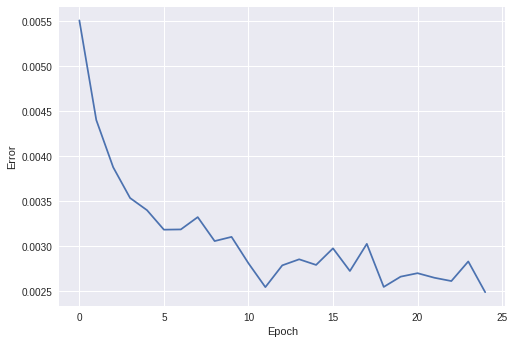

In [0]:
epochs = 25
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    err = sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_nb})
    print('Epoch {:.0f} :: Error={:.5f}'.format(i, err))
    errors.append(err)
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()